<a href="https://colab.research.google.com/github/dayaiit/test/blob/main/L4_MML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Linear Mappings in Mathematics and Machine Learning
# ====================================================

# This notebook demonstrates the concepts of linear mappings from basic definitions
# to their applications in machine learning algorithms.

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
import torch
import torch.nn as nn
from sklearn.datasets import make_regression, load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Set random seed for reproducibility
np.random.seed(42)
torch.manual_seed(42)



In [3]:
# Part 1: Basic Introduction to Linear Mappings
# =============================================
print("Part 1: Basic Introduction to Linear Mappings")
print("=============================================")

# Definition of a Linear Mapping
print("A mapping F: V → U between vector spaces is linear if:")
print("1. F(v + w) = F(v) + F(w) for all v, w in V")
print("2. F(kv) = kF(v) for all v in V and scalar k")
print("\n")


Part 1: Basic Introduction to Linear Mappings
A mapping F: V → U between vector spaces is linear if:
1. F(v + w) = F(v) + F(w) for all v, w in V
2. F(kv) = kF(v) for all v in V and scalar k




Example 1: Linear map defined by matrix A =
[[2 1]
 [1 3]]


F([1, 0]) = [2 1]
F([0, 1]) = [1 3]
F([2, 3]) = [ 7 11]

Verifying linearity property:
F(2*[1,0] + 3*[0,1]) = [ 7 11]
2*F([1,0]) + 3*F([0,1]) = [ 7 11]
Are they equal? True


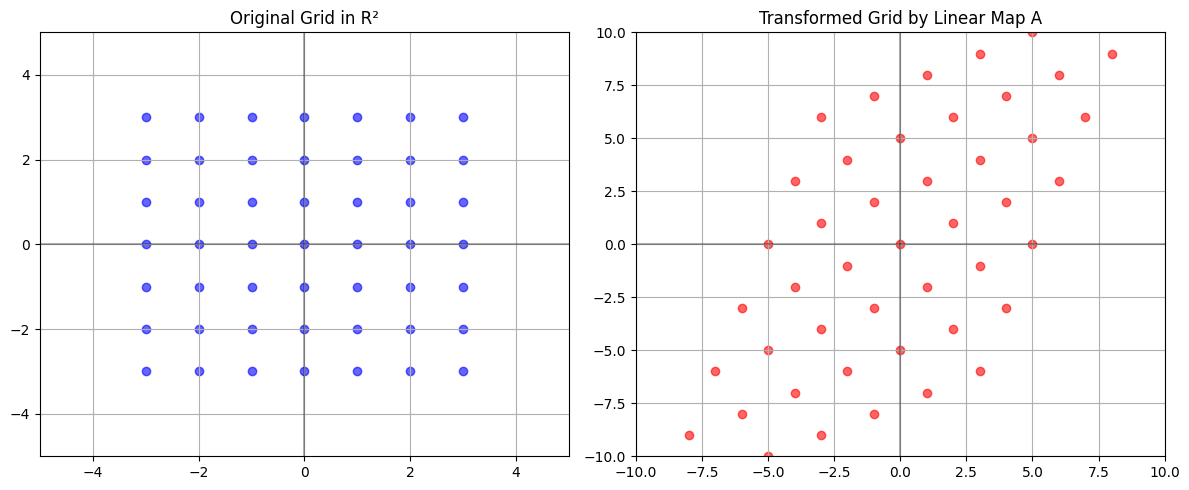

In [4]:

# Example 1: Simple Linear Map in R²
def linear_map_2d(x, y, A):
    """Apply a linear map defined by matrix A to a vector (x, y)"""
    return np.dot(A, np.array([x, y]))

# Create a simple linear map defined by a 2x2 matrix
A1 = np.array([[2, 1],
               [1, 3]])

print("Example 1: Linear map defined by matrix A =")
print(A1)
print("\n")

# Test vectors
v1 = np.array([1, 0])
v2 = np.array([0, 1])
v3 = np.array([2, 3])

print(f"F([1, 0]) = {linear_map_2d(v1[0], v1[1], A1)}")
print(f"F([0, 1]) = {linear_map_2d(v2[0], v2[1], A1)}")
print(f"F([2, 3]) = {linear_map_2d(v3[0], v3[1], A1)}")

# Let's verify linearity property: F(2*[1,0] + 3*[0,1]) = 2*F([1,0]) + 3*F([0,1])
left_side = linear_map_2d(2*v1[0] + 3*v2[0], 2*v1[1] + 3*v2[1], A1)
right_side = 2*linear_map_2d(v1[0], v1[1], A1) + 3*linear_map_2d(v2[0], v2[1], A1)

print("\nVerifying linearity property:")
print(f"F(2*[1,0] + 3*[0,1]) = {left_side}")
print(f"2*F([1,0]) + 3*F([0,1]) = {right_side}")
print(f"Are they equal? {np.array_equal(left_side, right_side)}")

# Visualization of Linear Mapping
plt.figure(figsize=(12, 5))

# Create a grid of points in R²
x = np.linspace(-3, 3, 7)
y = np.linspace(-3, 3, 7)
X, Y = np.meshgrid(x, y)
points = np.vstack([X.flatten(), Y.flatten()]).T

# Apply the linear mapping to all points
transformed_points = np.array([linear_map_2d(p[0], p[1], A1) for p in points])

# Plot the original and transformed grids
plt.subplot(1, 2, 1)
plt.scatter(points[:, 0], points[:, 1], c='blue', alpha=0.6)
plt.grid(True)
plt.title('Original Grid in R²')
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)

plt.subplot(1, 2, 2)
plt.scatter(transformed_points[:, 0], transformed_points[:, 1], c='red', alpha=0.6)
plt.grid(True)
plt.title('Transformed Grid by Linear Map A')
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)

plt.tight_layout()
plt.show()



Example 2: Projection onto xy-plane in R³
Original vector: [2 3 4]
Projected vector: [2 3 0]


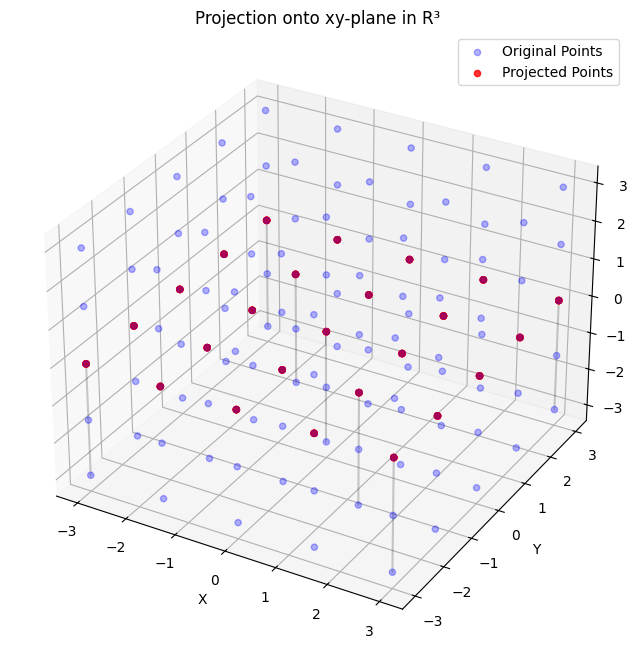

In [5]:

# Example 2: Another Linear Map (Projection onto xy-plane in R³)
def projection_xy_plane(x, y, z):
    """Project a point in R³ onto the xy-plane"""
    return np.array([x, y, 0])

print("\nExample 2: Projection onto xy-plane in R³")
v3d = np.array([2, 3, 4])
print(f"Original vector: {v3d}")
print(f"Projected vector: {projection_xy_plane(v3d[0], v3d[1], v3d[2])}")

# Visualization of the projection
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Create points in 3D
x = np.linspace(-3, 3, 5)
y = np.linspace(-3, 3, 5)
z = np.linspace(-3, 3, 5)
points_3d = []
for xi in x:
    for yi in y:
        for zi in z:
            points_3d.append([xi, yi, zi])
points_3d = np.array(points_3d)

# Apply projection
projected_points = np.array([projection_xy_plane(p[0], p[1], p[2]) for p in points_3d])

# Plot original and projected points
ax.scatter(points_3d[:, 0], points_3d[:, 1], points_3d[:, 2], c='blue', alpha=0.3, label='Original Points')
ax.scatter(projected_points[:, 0], projected_points[:, 1], projected_points[:, 2], c='red', alpha=0.8, label='Projected Points')

# Add connecting lines for some points to show the projection
for i in range(0, len(points_3d), 20):
    ax.plot([points_3d[i, 0], projected_points[i, 0]],
            [points_3d[i, 1], projected_points[i, 1]],
            [points_3d[i, 2], projected_points[i, 2]],
            'k-', alpha=0.2)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()
ax.set_title('Projection onto xy-plane in R³')
plt.show()


In [6]:

# Part 2: Properties of Linear Mappings
# =====================================
print("\nPart 2: Properties of Linear Mappings")
print("=====================================")

# Kernel and Image of Linear Mappings
print("The kernel of a linear map F: V → U is the set of all vectors v in V such that F(v) = 0.")
print("The image of F is the set of all vectors in U that are images of vectors in V.")



Part 2: Properties of Linear Mappings
The kernel of a linear map F: V → U is the set of all vectors v in V such that F(v) = 0.
The image of F is the set of all vectors in U that are images of vectors in V.


In [7]:

# Example 3: Find the kernel and image of a linear map
A2 = np.array([[1, 2, 3],
               [2, 4, 6]])

print("\nExample 3: Linear map defined by matrix A =")
print(A2)

# Finding the kernel (null space) using SVD
u, s, vh = np.linalg.svd(A2, full_matrices=True)
null_space = vh[np.argwhere(s < 1e-10).flatten()]
if len(null_space) == 0:
    kernel_basis = "The kernel is trivial (only the zero vector)"
else:
    kernel_basis = null_space

print("\nBasis for the kernel:")
print(kernel_basis)

# Finding the image (column space)
image_basis = []
for j in range(A2.shape[1]):
    col = A2[:, j]
    if not any(np.allclose(col, existing_col) for existing_col in image_basis):
        if np.linalg.norm(col) > 1e-10:  # Check if column is non-zero
            image_basis.append(col)

image_basis = np.array(image_basis).T

print("\nBasis for the image:")
print(image_basis)

print("\nRank of the linear map (dimension of the image):", np.linalg.matrix_rank(A2))
print("Nullity of the linear map (dimension of the kernel):", A2.shape[1] - np.linalg.matrix_rank(A2))
print("Rank + Nullity =", np.linalg.matrix_rank(A2) + (A2.shape[1] - np.linalg.matrix_rank(A2)), "= dimension of the domain")

# One-to-one and Onto Linear Maps
print("\nA linear map is one-to-one (injective) if its kernel contains only the zero vector.")
print("A linear map is onto (surjective) if its image is the entire codomain.")



Example 3: Linear map defined by matrix A =
[[1 2 3]
 [2 4 6]]

Basis for the kernel:
[[ 0.94491118 -0.30854944 -0.10927077]]

Basis for the image:
[[1 2 3]
 [2 4 6]]

Rank of the linear map (dimension of the image): 1
Nullity of the linear map (dimension of the kernel): 2
Rank + Nullity = 3 = dimension of the domain

A linear map is one-to-one (injective) if its kernel contains only the zero vector.
A linear map is onto (surjective) if its image is the entire codomain.


In [8]:

# Example 4: Checking if a linear map is one-to-one and/or onto
def is_one_to_one(A):
    """Check if a linear map defined by matrix A is one-to-one"""
    return np.linalg.matrix_rank(A) == A.shape[1]

def is_onto(A):
    """Check if a linear map defined by matrix A is onto"""
    return np.linalg.matrix_rank(A) == A.shape[0]

print("\nExample 4: Is our linear map one-to-one and/or onto?")
print(f"Is the map defined by matrix A one-to-one? {is_one_to_one(A2)}")
print(f"Is the map defined by matrix A onto? {is_onto(A2)}")

# Matrix Representation of Linear Mappings
print("\nLinear maps between finite-dimensional vector spaces can be represented by matrices.")
print("If {v₁, v₂, ..., vₙ} is a basis for V and {u₁, u₂, ..., uₘ} is a basis for U,")
print("then a linear map F: V → U is completely determined by the images F(vⱼ) for j = 1, 2, ..., n.")



Example 4: Is our linear map one-to-one and/or onto?
Is the map defined by matrix A one-to-one? False
Is the map defined by matrix A onto? False

Linear maps between finite-dimensional vector spaces can be represented by matrices.
If {v₁, v₂, ..., vₙ} is a basis for V and {u₁, u₂, ..., uₘ} is a basis for U,
then a linear map F: V → U is completely determined by the images F(vⱼ) for j = 1, 2, ..., n.


In [9]:

# Example 5: Custom basis representation
print("\nExample 5: Representing a linear map with respect to custom bases")

# Define a linear map from R² to R² by specifying the images of standard basis vectors
F_e1 = np.array([3, 1])  # F(e₁) = (3, 1)
F_e2 = np.array([2, 4])  # F(e₂) = (2, 4)

# The matrix representation with respect to the standard basis
A_standard = np.column_stack([F_e1, F_e2])
print("Matrix representation with respect to standard basis:")
print(A_standard)

# Define new bases for the domain and codomain
V_basis = np.array([[1, 1], [1, -1]])  # New basis for domain: {(1,1), (1,-1)}
U_basis = np.array([[1, 0], [1, 1]])   # New basis for codomain: {(1,0), (1,1)}

# Calculate the change of basis matrices
V_basis_inv = np.linalg.inv(V_basis.T)
U_basis_inv = np.linalg.inv(U_basis.T)

# Calculate the matrix representation with respect to the new bases
A_custom = U_basis_inv @ A_standard @ V_basis
print("\nMatrix representation with respect to custom bases:")
print(A_custom)



Example 5: Representing a linear map with respect to custom bases
Matrix representation with respect to standard basis:
[[3 2]
 [1 4]]

Matrix representation with respect to custom bases:
[[ 0.  4.]
 [ 5. -3.]]


In [10]:
# Part 3: Operations with Linear Mappings
# ======================================
print("\nPart 3: Operations with Linear Mappings")
print("======================================")

# Addition of Linear Maps
print("If F, G: V → U are linear maps, then F + G: V → U defined by (F + G)(v) = F(v) + G(v) is also linear.")




Part 3: Operations with Linear Mappings
If F, G: V → U are linear maps, then F + G: V → U defined by (F + G)(v) = F(v) + G(v) is also linear.


In [11]:
# Example 6: Addition of linear maps
A3 = np.array([[1, 2],
               [3, 4]])

B3 = np.array([[5, 6],
               [7, 8]])

print("\nExample 6: Addition of linear maps")
print("Matrix A =")
print(A3)
print("\nMatrix B =")
print(B3)
print("\nMatrix A + B =")
print(A3 + B3)

# Verify on a specific vector
v = np.array([2, 3])
print(f"\nFor vector v = {v}:")
print(f"(A + B)v = {(A3 + B3) @ v}")
print(f"Av + Bv = {A3 @ v + B3 @ v}")

# Scalar Multiplication of Linear Maps
print("\nIf F: V → U is a linear map and c is a scalar, then cF: V → U defined by (cF)(v) = c·F(v) is also linear.")



Example 6: Addition of linear maps
Matrix A =
[[1 2]
 [3 4]]

Matrix B =
[[5 6]
 [7 8]]

Matrix A + B =
[[ 6  8]
 [10 12]]

For vector v = [2 3]:
(A + B)v = [36 56]
Av + Bv = [36 56]

If F: V → U is a linear map and c is a scalar, then cF: V → U defined by (cF)(v) = c·F(v) is also linear.


In [12]:

# Example 7: Scalar multiplication of a linear map
c = 2.5
print(f"\nExample 7: Scalar multiplication of a linear map by c = {c}")
print("Matrix A =")
print(A3)
print(f"\nMatrix {c}A =")
print(c * A3)

# Verify on a specific vector
print(f"\nFor vector v = {v}:")
print(f"({c}A)v = {(c * A3) @ v}")
print(f"{c}(Av) = {c * (A3 @ v)}")

# Composition of Linear Maps
print("\nIf F: V → U and G: U → W are linear maps, then G ∘ F: V → W defined by (G ∘ F)(v) = G(F(v)) is also linear.")



Example 7: Scalar multiplication of a linear map by c = 2.5
Matrix A =
[[1 2]
 [3 4]]

Matrix 2.5A =
[[ 2.5  5. ]
 [ 7.5 10. ]]

For vector v = [2 3]:
(2.5A)v = [20. 45.]
2.5(Av) = [20. 45.]

If F: V → U and G: U → W are linear maps, then G ∘ F: V → W defined by (G ∘ F)(v) = G(F(v)) is also linear.


In [13]:
# Example 8: Composition of linear maps
A4 = np.array([[1, 2],
               [3, 4]])

B4 = np.array([[5, 6],
               [7, 8]])

print("\nExample 8: Composition of linear maps")
print("Matrix A =")
print(A4)
print("\nMatrix B =")
print(B4)
print("\nMatrix B ∘ A = BA =")
print(B4 @ A4)

# Verify on a specific vector
v = np.array([2, 3])
print(f"\nFor vector v = {v}:")
print(f"B(Av) = {B4 @ (A4 @ v)}")
print(f"(BA)v = {(B4 @ A4) @ v}")

# Polynomial of Linear Operators
print("\nIf T: V → V is a linear operator and p(t) = a₀ + a₁t + a₂t² + ... + aₙtⁿ is a polynomial,")
print("then p(T) = a₀I + a₁T + a₂T² + ... + aₙTⁿ is also a linear operator.")



Example 8: Composition of linear maps
Matrix A =
[[1 2]
 [3 4]]

Matrix B =
[[5 6]
 [7 8]]

Matrix B ∘ A = BA =
[[23 34]
 [31 46]]

For vector v = [2 3]:
B(Av) = [148 200]
(BA)v = [148 200]

If T: V → V is a linear operator and p(t) = a₀ + a₁t + a₂t² + ... + aₙtⁿ is a polynomial,
then p(T) = a₀I + a₁T + a₂T² + ... + aₙTⁿ is also a linear operator.


In [14]:

# Example 9: Polynomial of a linear operator
A5 = np.array([[2, 1],
               [1, 2]])

print("\nExample 9: Polynomial of a linear operator")
print("Matrix A =")
print(A5)

# Calculate A²
A5_squared = A5 @ A5
print("\nA² =")
print(A5_squared)

# Calculate p(A) for p(t) = t² - 3t + 2I
p_A = A5_squared - 3 * A5 + 2 * np.eye(2)
print("\nFor p(t) = t² - 3t + 2, p(A) =")
print(p_A)

# Verify the Cayley-Hamilton theorem (every matrix satisfies its own characteristic polynomial)
eigenvalues, _ = np.linalg.eig(A5)
print("\nEigenvalues of A:", eigenvalues)

# Characteristic polynomial is (t - λ₁)(t - λ₂) = t² - (λ₁ + λ₂)t + λ₁λ₂
trace_A = np.trace(A5)
det_A = np.linalg.det(A5)
print(f"Characteristic polynomial: t² - {trace_A}t + {det_A}")

# Verify that A satisfies its characteristic polynomial
char_poly_A = A5_squared - trace_A * A5 + det_A * np.eye(2)
print("\nA² - (trace of A)A + (det of A)I =")
print(char_poly_A)
print("Note how close this is to the zero matrix, demonstrating the Cayley-Hamilton theorem.")



Example 9: Polynomial of a linear operator
Matrix A =
[[2 1]
 [1 2]]

A² =
[[5 4]
 [4 5]]

For p(t) = t² - 3t + 2, p(A) =
[[1. 1.]
 [1. 1.]]

Eigenvalues of A: [3. 1.]
Characteristic polynomial: t² - 4t + 2.9999999999999996

A² - (trace of A)A + (det of A)I =
[[-4.4408921e-16  0.0000000e+00]
 [ 0.0000000e+00 -4.4408921e-16]]
Note how close this is to the zero matrix, demonstrating the Cayley-Hamilton theorem.


In [15]:
# Part 4: Applications to Machine Learning
# =======================================
print("\nPart 4: Applications to Machine Learning")
print("=======================================")

# Linear Regression as a Linear Mapping
print("\nLinear regression can be viewed as a linear mapping from feature space to output space.")




Part 4: Applications to Machine Learning

Linear regression can be viewed as a linear mapping from feature space to output space.



Example 10: Linear Regression
Fitted model: y = 44.2442x + 0.0992


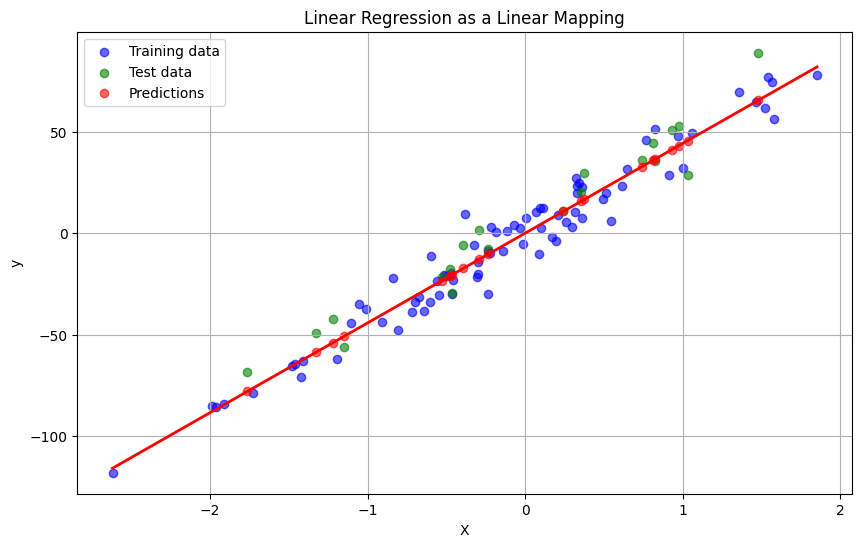

In [16]:
# Example 10: Linear Regression
# Generate some data
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Get model parameters
w = model.coef_[0]
b = model.intercept_

print("\nExample 10: Linear Regression")
print(f"Fitted model: y = {w:.4f}x + {b:.4f}")

# Predictions
y_pred = model.predict(X_test)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', alpha=0.6, label='Training data')
plt.scatter(X_test, y_test, color='green', alpha=0.6, label='Test data')
plt.scatter(X_test, y_pred, color='red', alpha=0.6, label='Predictions')

# Plot the regression line
x_line = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_line = model.predict(x_line)
plt.plot(x_line, y_line, color='red', linewidth=2)

plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression as a Linear Mapping')
plt.legend()
plt.grid(True)
plt.show()


In [17]:

# Example 11: Multiple Linear Regression
print("\nExample 11: Multiple Linear Regression")

# Generate data with multiple features
X_multi, y_multi = make_regression(n_samples=100, n_features=3, noise=10, random_state=42)
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42)

# Fit a linear regression model
model_multi = LinearRegression()
model_multi.fit(X_train_multi, y_train_multi)

# Get model parameters
w_multi = model_multi.coef_
b_multi = model_multi.intercept_

print(f"Fitted model: y = {w_multi[0]:.4f}x₁ + {w_multi[1]:.4f}x₂ + {w_multi[2]:.4f}x₃ + {b_multi:.4f}")

# The linear mapping can be represented as a matrix multiplication
W_matrix = np.append(w_multi, b_multi).reshape(1, -1)
print("\nMatrix representation of the linear mapping:")
print(W_matrix)

# Create a small sample of data to show the linear mapping in action
X_sample = np.array([[1.0, 2.0, 3.0]])
X_sample_augmented = np.column_stack([X_sample, np.ones(X_sample.shape[0])])

# Apply the linear mapping
y_sample = X_sample_augmented @ W_matrix.T
print("\nSample input X =", X_sample[0])
print("Predicted output y =", y_sample[0, 0])
print("Verification using model.predict():", model_multi.predict(X_sample)[0])

# Linear Transformations in Neural Networks
print("\nNeural networks are built from compositions of linear mappings and non-linear activation functions.")



Example 11: Multiple Linear Regression
Fitted model: y = 28.4948x₁ + 74.3953x₂ + 18.7813x₃ + 1.3038

Matrix representation of the linear mapping:
[[28.49475136 74.39534965 18.78132401  1.30375945]]

Sample input X = [1. 2. 3.]
Predicted output y = 234.93318214859823
Verification using model.predict(): 234.93318214859823

Neural networks are built from compositions of linear mappings and non-linear activation functions.


In [18]:
# Example 12: Single Layer Neural Network
print("\nExample 12: Single Layer Neural Network")

# Define a simple neural network model
class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleNN, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.linear1(x)  # Linear mapping
        x = self.relu(x)     # Non-linear activation
        x = self.linear2(x)  # Linear mapping
        return x

# Create a model
input_size = 3
hidden_size = 4
output_size = 1
model = SimpleNN(input_size, hidden_size, output_size)

# Print model architecture
print("Model architecture:")
print(model)

# Create a sample input
x_sample_nn = torch.tensor([[1.0, 2.0, 3.0]], dtype=torch.float32)

# Get the weight matrices and bias vectors
W1 = model.linear1.weight.detach().numpy()
b1 = model.linear1.bias.detach().numpy()
W2 = model.linear2.weight.detach().numpy()
b2 = model.linear2.bias.detach().numpy()

print("\nWeight matrix W1:")
print(W1)
print("\nBias vector b1:")
print(b1)
print("\nWeight matrix W2:")
print(W2)
print("\nBias vector b2:")
print(b2)

# Compute the output of the first linear layer
z1 = x_sample_nn.detach().numpy() @ W1.T + b1
print("\nOutput of first linear layer z1 = W1x + b1:")
print(z1)

# Apply ReLU activation
a1 = np.maximum(0, z1)
print("\nOutput after ReLU activation a1 = ReLU(z1):")
print(a1)

# Compute the output of the second linear layer
z2 = a1 @ W2.T + b2
print("\nOutput of second linear layer z2 = W2a1 + b2:")
print(z2)

# Verify with PyTorch model
with torch.no_grad():
    model_output = model(x_sample_nn)
    print("\nOutput from PyTorch model:")
    print(model_output.numpy())

# PCA as a Linear Mapping
print("\nPrincipal Component Analysis (PCA) is a linear mapping that projects data onto directions of maximum variance.")



Example 12: Single Layer Neural Network
Model architecture:
SimpleNN(
  (linear1): Linear(in_features=3, out_features=4, bias=True)
  (relu): ReLU()
  (linear2): Linear(in_features=4, out_features=1, bias=True)
)

Weight matrix W1:
[[ 0.44140652  0.47920528 -0.13525727]
 [ 0.53036046 -0.1264995   0.11650391]
 [-0.28108588  0.3390678   0.50895905]
 [-0.4235604   0.50183064  0.10805647]]

Bias vector b1:
[ 0.4265515   0.07819088  0.27839142 -0.08151666]

Weight matrix W2:
[[ 0.3854429   0.07390445 -0.23341995  0.12744915]]

Bias vector b2:
[-0.23036832]

Output of first linear layer z1 = W1x + b1:
[[1.4205967  0.70506406 2.2023182  0.8227536 ]]

Output after ReLU activation a1 = ReLU(z1):
[[1.4205967  0.70506406 2.2023182  0.8227536 ]]

Output of second linear layer z2 = W2a1 + b2:
[[-0.03990775]]

Output from PyTorch model:
[[-0.03990772]]

Principal Component Analysis (PCA) is a linear mapping that projects data onto directions of maximum variance.



Example 13: PCA on digits dataset


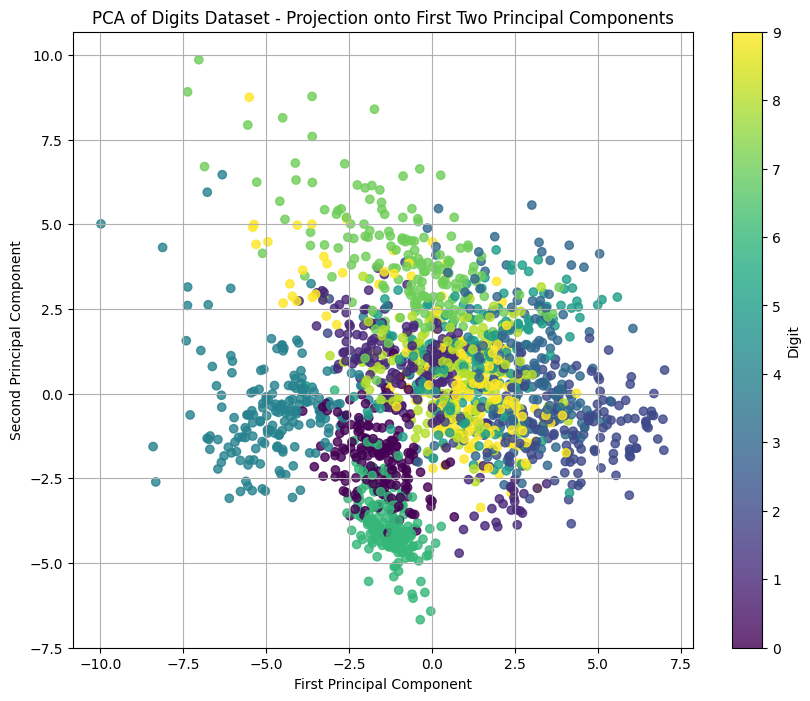


The PCA transformation is a linear mapping defined by the eigenvectors of the covariance matrix.
The principal components (eigenvectors) form the columns of the transformation matrix.

First two principal components (eigenvectors):
PC1: [-0.          0.18223392  0.285868    0.22036967 -0.02516956 -0.00949725
 -0.0524765  -0.06269499  0.03470727  0.24553368] ...
PC2: [ 0.          0.04702701  0.0595648  -0.02080385  0.15590316  0.27413299
  0.24973251  0.14583207 -0.00102721  0.02761909] ...

Explained variance ratio: [0.12033916 0.09561054]
Total variance explained: 21.59%


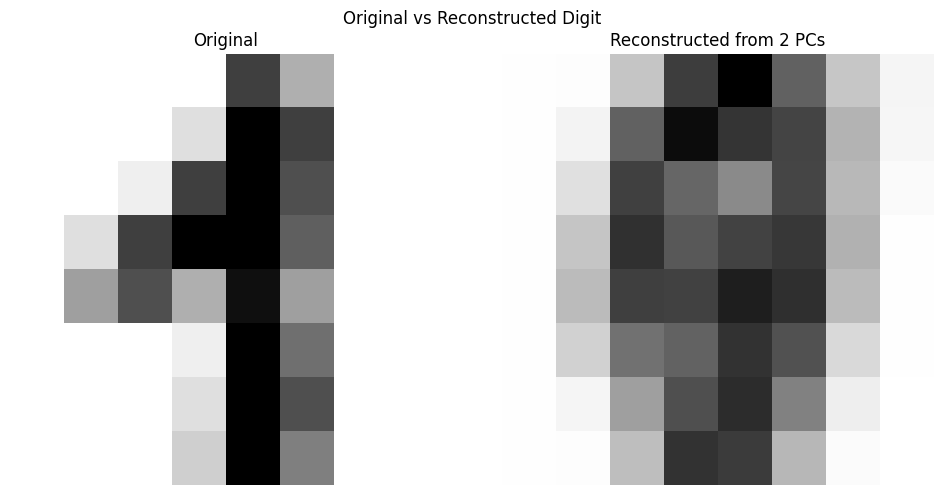

In [19]:
# Example 13: PCA
print("\nExample 13: PCA on digits dataset")

# Load digits dataset
digits = load_digits()
X = digits.data
y = digits.target

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot the first two principal components
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.8)
plt.colorbar(scatter, label='Digit')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA of Digits Dataset - Projection onto First Two Principal Components')
plt.grid(True)
plt.show()

# Explain the linear mapping in PCA
print("\nThe PCA transformation is a linear mapping defined by the eigenvectors of the covariance matrix.")
print("The principal components (eigenvectors) form the columns of the transformation matrix.")

# Get the principal components (eigenvectors)
principal_components = pca.components_
print("\nFirst two principal components (eigenvectors):")
for i, pc in enumerate(principal_components):
    print(f"PC{i+1}:", pc[:10], "...")  # Show just the first 10 values

# Explained variance
explained_variance = pca.explained_variance_ratio_
print("\nExplained variance ratio:", explained_variance)
print(f"Total variance explained: {sum(explained_variance)*100:.2f}%")

# Reconstruct the data using the first two principal components
X_reconstructed = X_pca @ principal_components
X_reconstructed = scaler.inverse_transform(X_reconstructed)

# Display an original and reconstructed digit
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
idx = 42  # Choose an example digit

axes[0].imshow(digits.images[idx], cmap='binary')
axes[0].set_title('Original')
axes[0].axis('off')

reconstructed_image = X_reconstructed[idx].reshape(8, 8)
axes[1].imshow(reconstructed_image, cmap='binary')
axes[1].set_title('Reconstructed from 2 PCs')
axes[1].axis('off')

plt.suptitle('Original vs Reconstructed Digit')
plt.tight_layout()
plt.show()



Example 14: Kernel PCA


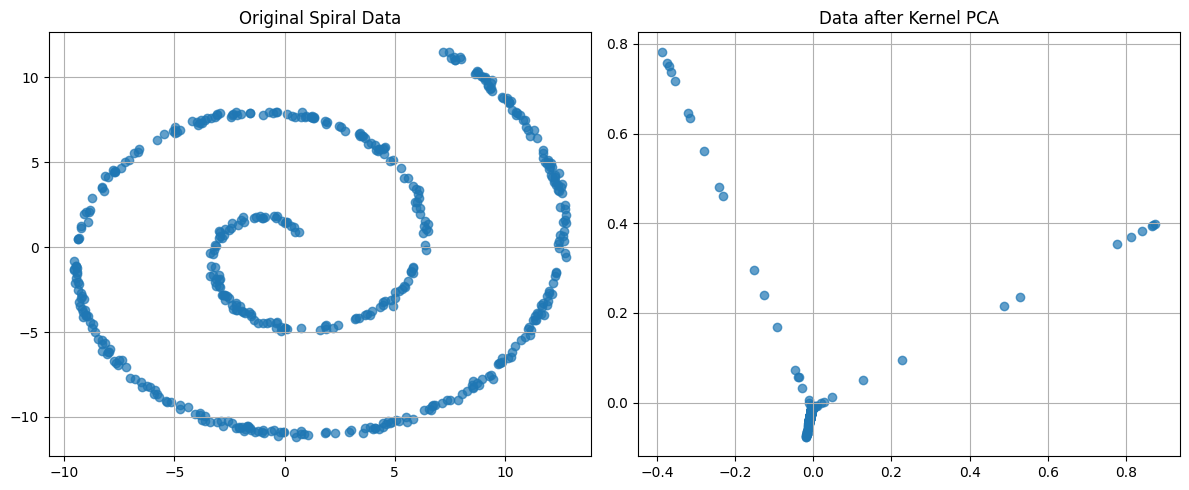


Kernel PCA uses the 'kernel trick' to implicitly map the data to a higher-dimensional space
where linear PCA can then separate non-linear patterns.

Conclusion
Linear mappings form the foundation of many machine learning algorithms:
- Linear regression is a direct application of linear mappings
- Neural networks use compositions of linear mappings and non-linear activations
- PCA uses linear mappings to project data onto directions of maximum variance

Understanding the mathematics behind these methods provides insight into how they work and when they might fail.


In [20]:

# Example 14: Kernel PCA (non-linear extension of PCA)
print("\nExample 14: Kernel PCA")

# Create a non-linear dataset (a simple spiral)
def make_spiral(n_samples=100, noise=0.1):
    n = np.sqrt(np.random.rand(n_samples)) * 780 * (2 * np.pi) / 360
    X = np.zeros((n_samples, 2))
    X[:, 0] = np.cos(n) * n + np.random.randn(n_samples) * noise
    X[:, 1] = np.sin(n) * n + np.random.randn(n_samples) * noise
    return X

# Generate spiral data
X_spiral = make_spiral(n_samples=500, noise=0.1)

# Apply kernel PCA using a radial basis function (RBF) kernel
from sklearn.decomposition import KernelPCA

kpca = KernelPCA(n_components=2, kernel='rbf', gamma=10)
X_kpca = kpca.fit_transform(X_spiral)

# Visualize the data before and after kernel PCA
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_spiral[:, 0], X_spiral[:, 1], alpha=0.7)
plt.title('Original Spiral Data')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(X_kpca[:, 0], X_kpca[:, 1], alpha=0.7)
plt.title('Data after Kernel PCA')
plt.grid(True)

plt.tight_layout()
plt.show()

print("\nKernel PCA uses the 'kernel trick' to implicitly map the data to a higher-dimensional space")
print("where linear PCA can then separate non-linear patterns.")

# Conclusion
print("\nConclusion")
print("==========")
print("Linear mappings form the foundation of many machine learning algorithms:")
print("- Linear regression is a direct application of linear mappings")
print("- Neural networks use compositions of linear mappings and non-linear activations")
print("- PCA uses linear mappings to project data onto directions of maximum variance")
print("\nUnderstanding the mathematics behind these methods provides insight into how they work and when they might fail.")